In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv('heart failure.csv') #import file

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

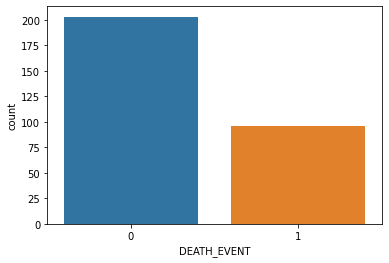

In [8]:
sbn.countplot('DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

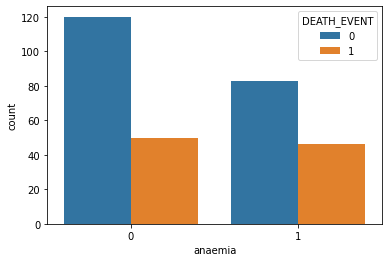

In [11]:
sbn.countplot(x='anaemia',hue='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

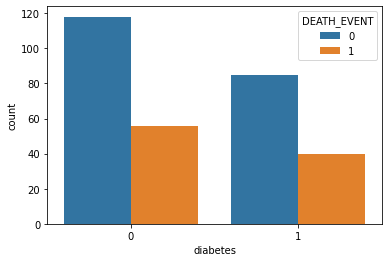

In [12]:
sbn.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

In [13]:
x = df.drop('DEATH_EVENT', axis=1)

In [14]:
y = df['DEATH_EVENT']

In [15]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42, test_size=.25)

In [21]:
xtrain.shape

(224, 12)

In [22]:
xtest.shape

(75, 12)

# Decision Tree Clasifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Score

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score

In [28]:
pred = dtc.predict(xtest)

In [29]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
np.array(ytest)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [33]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        44
           1       0.64      0.45      0.53        31

    accuracy                           0.67        75
   macro avg       0.66      0.63      0.64        75
weighted avg       0.66      0.67      0.65        75



In [34]:
accuracy_score(ytest, pred)

0.6666666666666666

In [35]:
confusion_matrix(ytest, pred)

array([[36,  8],
       [17, 14]], dtype=int64)

In [44]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [45]:
tp

36

In [38]:
fn

8

In [39]:
fp

17

In [40]:
tn

14

# Accuracy

In [69]:
accuracy = (tp+tn)/(tp+tn+fp+fn)

In [70]:
accuracy

0.6666666666666666

# Precision or positive predicted value (PPV)

In [48]:
precision = tp /(tp+fp)

In [49]:
precision

0.6792452830188679

# Sencitivity or True Positive Rate

In [50]:
TPR = tp/(tp+fn)

In [51]:
TPR

0.8181818181818182

# False Positive Rate

In [52]:
FPR = fp/(fp+tn)

In [53]:
FPR

0.5483870967741935

# F1 Measure

In [54]:
F1_Measure = (precision+TPR)/2

In [55]:
F1_Measure

0.7487135506003431

# Harmonic Mean or F1 Score

In [56]:
F1 = (2*precision*TPR)/(precision+TPR)

In [57]:
F1

0.7422680412371134

# True Negative Rate

In [59]:
TNR = tn/(tn+fp)

In [60]:
TNR

0.45161290322580644

# Critical Success Index

In [61]:
CSI = tp / (tp+fp+fn)

In [62]:
CSI

0.5901639344262295

# False Discovery Rate

In [63]:
FDR = fp/(fp+tp)

In [64]:
FDR

0.32075471698113206

In [65]:
roc_auc_score(ytest,pred)

0.6348973607038123

# ROC Curve

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


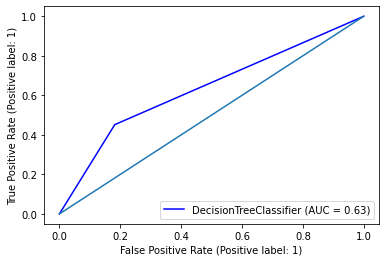

In [68]:
plot_roc_curve(dtc,xtest,ytest,color='Blue')
plt.plot([0,1],[0,1])